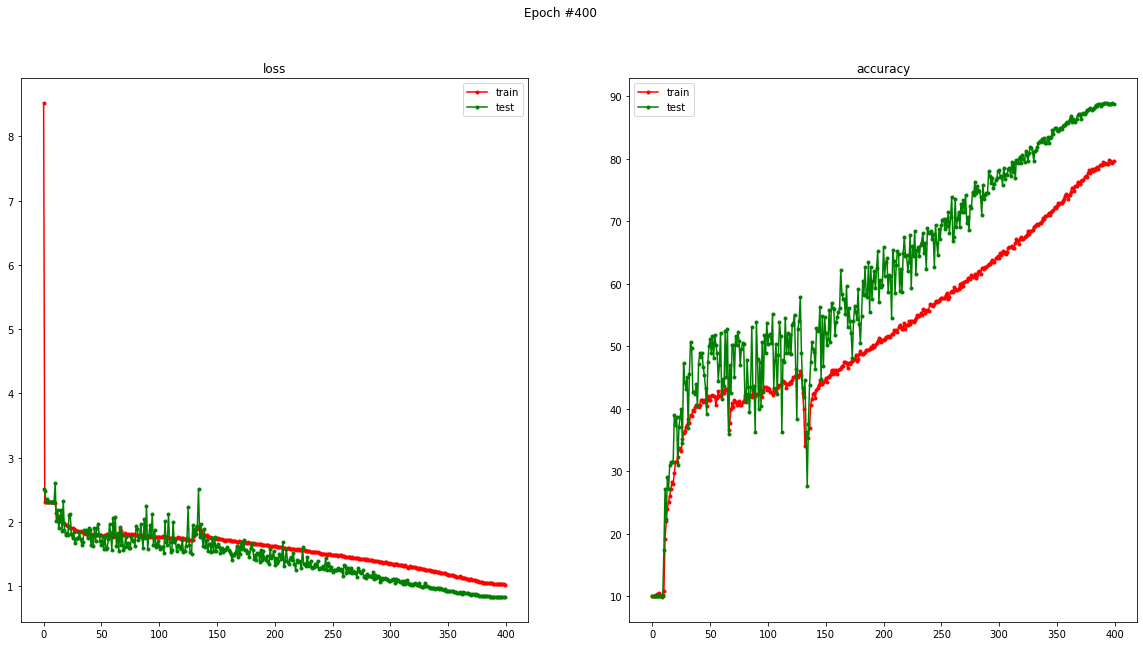

In [18]:
import torch
from code.data.cifar import Cifar10
from code.model.resnet import Resnet
from code.sam import SAM
from code.train import train


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

num_epochs = 400
batch_size = 128
threads = 2
lr=1.0
momentum=0.9
nesterov=True
weight_decay=1e-4
rho=0.05
label_smoothing = 0.1

use_autoaugment, use_cutout = True, True

dataset = Cifar10(batch_size, use_autoaugment, use_cutout, threads=threads)
num_classes = dataset.num_classes
model = Resnet('resnet50', num_classes).to(device)

base_optimizer = torch.optim.SGD
optimizer = SAM(model.parameters(), base_optimizer, rho=rho, lr=lr, momentum=momentum, weight_decay=weight_decay, nesterov=nesterov)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer.base_optimizer, T_max=num_epochs)

train(optimizer, scheduler, model, dataset, num_epochs, label_smoothing=label_smoothing, device=device)